# EDA on Zomato DataSet

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings

In [125]:
warnings.filterwarnings('ignore')
matplotlib.rcParams['figure.figsize']=(12,6)

In [126]:
df = pd.read_csv('zomato.csv', encoding='latin-1')
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


### Dataset Insight

In [127]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [128]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [129]:
df.shape
#there are 9551 rows, 21 columns

(9551, 21)

In [130]:
df.info()
#the given data type in dataset are float(3), integer(5), object(13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### In data analysis what we basically do?

1. Missing Values
2. Explore About the Numerical Variables
3. Explore About categorical Variables
4. Finding Relationship between features

### FInd the Missing Value

In [131]:
df.isnull().sum()
#there are 9 null values in the object type cuisines which is 9

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [132]:
[feature for feature in df.columns if df[feature].isnull().sum() > 0]

['Cuisines']

<Axes: >

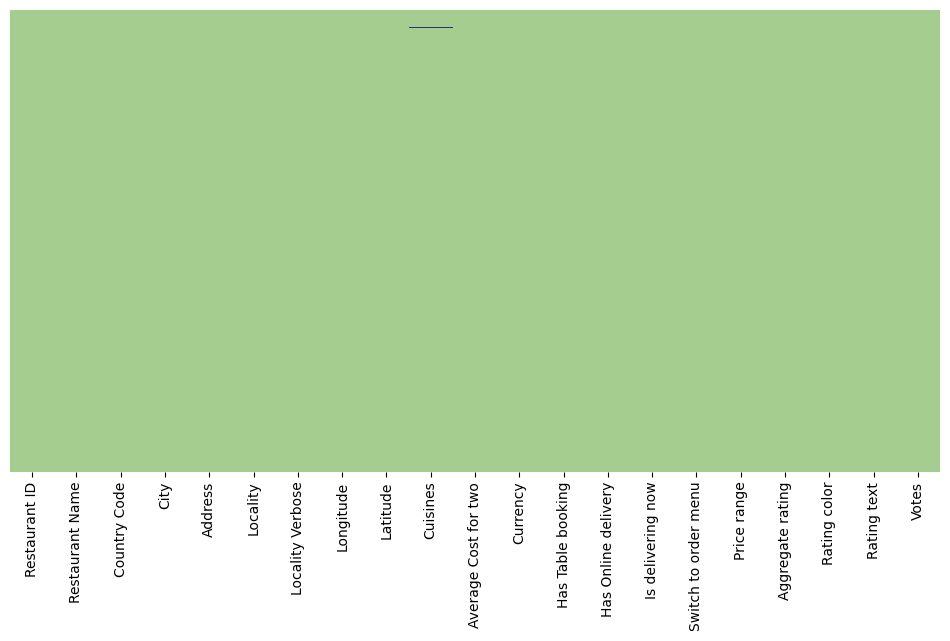

In [133]:
sns.heatmap(df.isnull(), xticklabels= True, yticklabels=False, cbar=False, cmap='crest')

In [134]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head()


,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [135]:
final_df = pd.merge(df, df_country, how='left', on = 'Country Code')
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [136]:
final_df.groupby(['Aggregate rating', 'Country']).size().reset_index()
        
    

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1
...,...,...,...
217,4.9,Sri Lanka,1
218,4.9,Turkey,3
219,4.9,UAE,4
220,4.9,United Kingdom,4


In [137]:
final_df.groupby(['Country','Currency']).size().reset_index().rename(columns= {0: 'Total No'})

,Country,Currency,Total No
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [138]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [139]:
#top 4 countries 
country_name= final_df['Country'].value_counts().index
country_values = final_df['Country'].value_counts().values

([<matplotlib.patches.Wedge at 0x1c2068d0410>,
 [Text(-1.082974277862112, 0.1927867046480056, 'India'),
  Text(1.0772816964394372, -0.22240536530526556, 'United States'),
  Text(1.0995865232164619, -0.030157552300104404, 'United Kingdom')],
 [Text(-0.5907132424702428, 0.10515638435345759, '94.392%'),
  Text(0.5876081980578747, -0.12131201743923574, '4.735%'),
  Text(0.5997744672089791, -0.01644957398187513, '0.873%')])

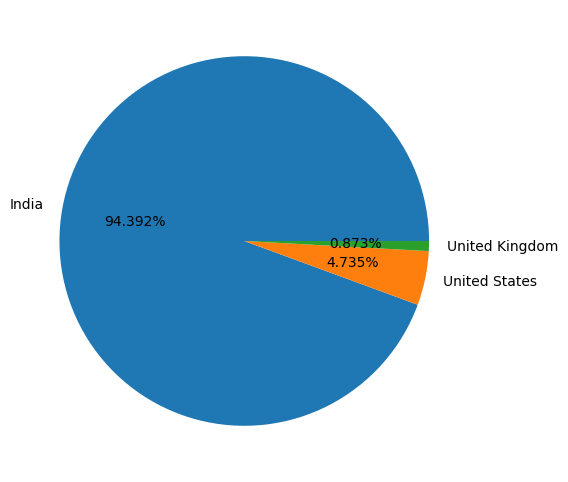

In [140]:
plt.pie(x=country_values[:3], labels=country_name[:3], autopct='%1.3f%%')

 Observation: India, USA, Uk are the top 3 countries where the zomato captured maximum respectively.

In [149]:
rating_df = final_df.groupby(['Aggregate rating', 'Rating color']).size().reset_index().rename(columns={0:'Total No'})
rating_df

,Aggregate rating,Rating color,Total No
0,0.0,White,2148
1,1.8,Red,1
2,1.9,Red,2
3,2.0,Red,7
4,2.1,Red,15
5,2.2,Red,27
6,2.3,Red,47
7,2.4,Red,87
8,2.5,Orange,110
9,2.6,Orange,191


In [161]:
rating_df['Rating color'].value_counts()

Rating color
Orange        10
Red            7
Green          5
Yellow         5
Dark Green     5
White          1
Name: count, dtype: int64

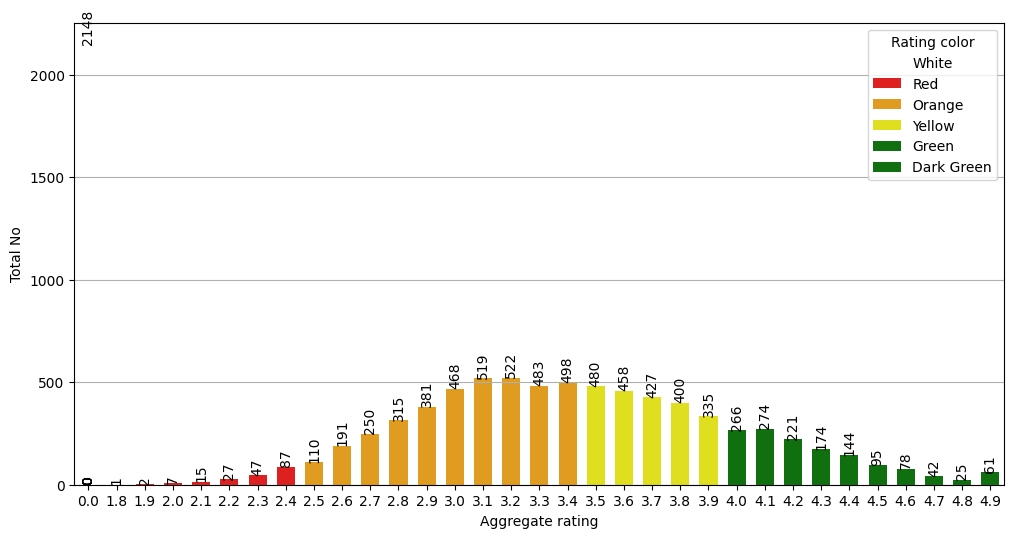

In [212]:
plot = sns.barplot(x="Aggregate rating",y="Total No",data=rating_df, palette=['White','Red', 'Orange', 'Yellow', 'Green', 'Green'], hue='Rating color', gap=.2)
for p in plot.patches:
    plot.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center', va='bottom', rotation=90
    )
plt.grid(which='both', axis='y')


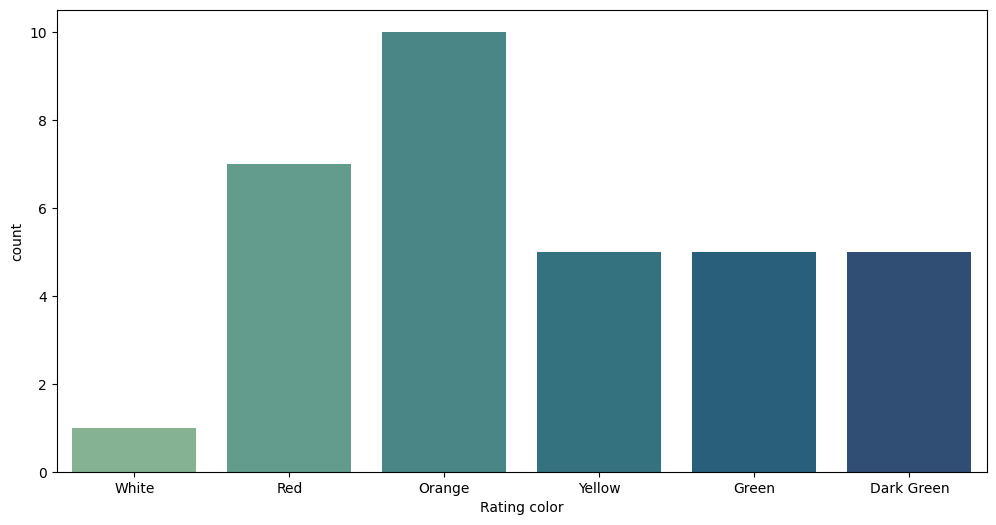

In [196]:
# Count plot
sns.countplot(x='Rating color', data=rating_df, palette='crest' )
plt.grid(which='minor', axis='y')

In [ ]:
final_df.groupby(['Country','Has Online delivery']).size().reset_index().rename(columns= {0: 'Total Order'})

,Country,Has Online delivery,Total Order
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20
